# Linear Regression

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [7]:
df = pd.read_csv('../../../data/weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

<AxesSubplot:title={'center':'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

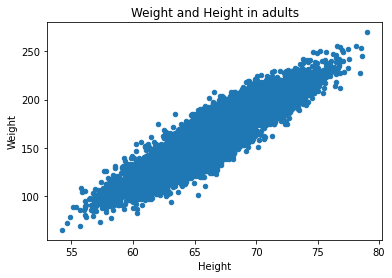

In [10]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

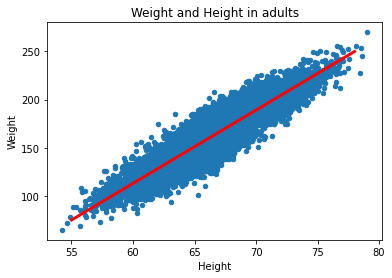

In [12]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

#Create a trendline manually
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [13]:
def line(x, w=0, b=0):
    return x * w + b

In [20]:
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [25]:
#Y hat with parameters equals 0 
y_hat = line(x, w=0, b=0)
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

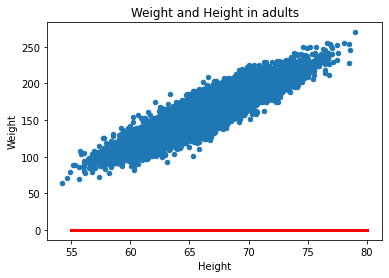

In [21]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

## Mean Squared Error

In [24]:
def mean_squared_error(y_real, y_predicted):
    s = (y_real - y_predicted)**2
    return s.mean()

In [30]:
x = df[['Height']].values
y_real = df['Weight'].values
y_real

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [33]:
y_predicted = line(x)
y_predicted

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [34]:
#Calculate mean squared error
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

## Linear Regression with Keras

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

ModuleNotFoundError: No module named 'tensorflow'

## Linear Regression with Scikit Learn

In [45]:
from sklearn.linear_model import LinearRegression

In [75]:
x = df[['Height']].values
y = df['Weight'].values

In [76]:
model = LinearRegression().fit(x, y)
print(f'alpha = {model.intercept_}')
print(f'beta = {model.coef_}')

r_squared = model.score(x, y)
print('Coefficient of Determination (R squared):', r_squared)
y_predicted = model.predict(x)


alpha = -350.73719181213664
beta = [7.71728764]
Coefficient of Determination (R squared): 0.8551742120609958


In [68]:
y_predicted
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

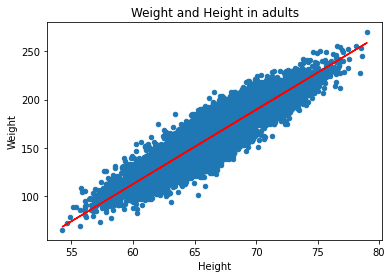

In [69]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, y_predicted, color='red')


## Linear Regression with statsmodel

In [77]:
import statsmodels.formula.api as smf

In [78]:
x = df[['Height']].values
y = df['Weight'].values

# Ordinary Least Squares (OLS)
model = sm.OLS(y, x).fit()
y_predicted = model.predict(x)

In [79]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                        0.00
Time:                        22:12:31   Log-Likelihood:                         -45841.
No. Observations:               10000   AIC:                                  9.168e+04
Df Residuals:                    9999   BIC:                                  9.169e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4502      0.004    687.489      0.000       2.443       2.457
==============================================================================
Omnibus:                      980.641   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.304
Skew:                           0.021   Prob(JB):                     2.49e-63
Kurtosis:                       2.169   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

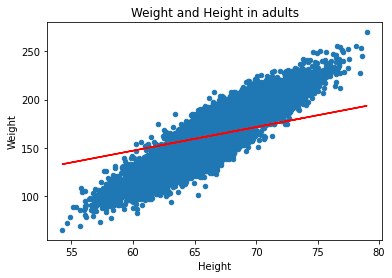

In [81]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, y_predicted, color='red')